In [1]:
# Importing 

import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
#hiding all warnings
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

## Owid energy data

Contains long history of energy data per country with extensive division of energy types and both percentages and nominals.



In [3]:
# Source
# https://github.com/owid/energy-data

df = pd.DataFrame()

df = pd.read_csv('source_data/owid-energy-data.csv')

df.head(20)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Afghanistan,1905,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Afghanistan,1906,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Afghanistan,1907,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Afghanistan,1908,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Afghanistan,1909,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-4-52a6a3c2aef4>:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df3.to_excel('output.xls')


<AxesSubplot:xlabel='year'>

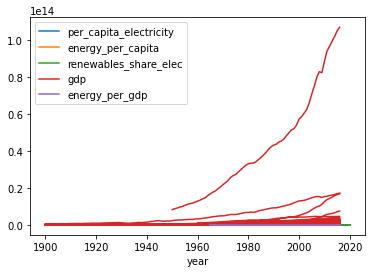

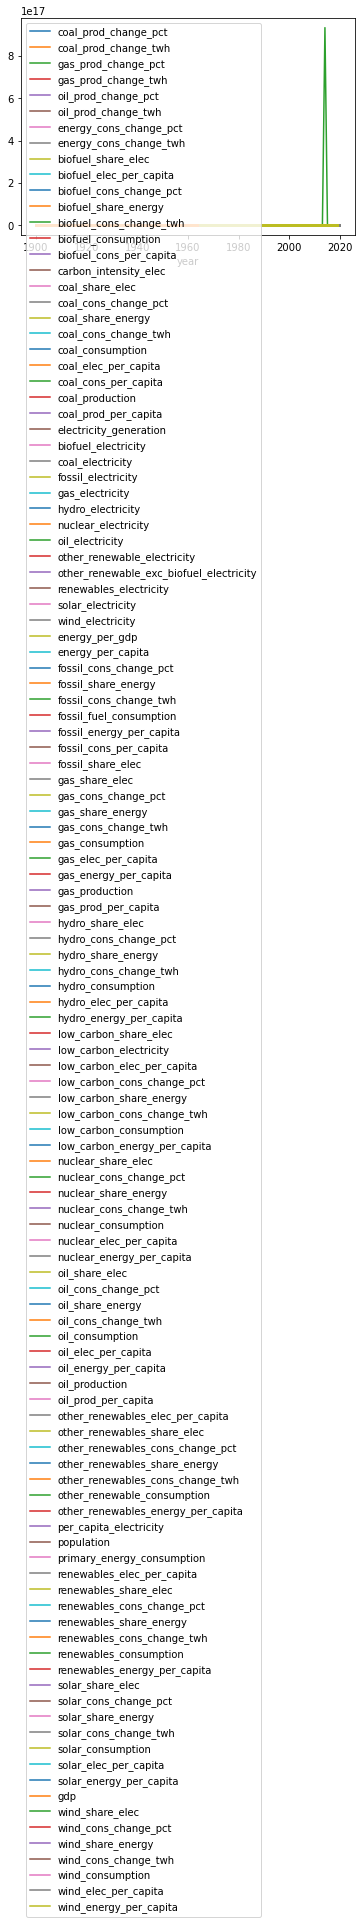

In [4]:
# TEMP - NEVERMIND THIS CELL
# figuring out the data with slicing, outputs & plots

df2 = df[['year', 'iso_code', 'per_capita_electricity', 'energy_per_capita', 'renewables_share_elec', 'gdp', 'energy_per_gdp']]

#df3 = df2['year']

#df3['per_capita_electricity'] = 
df3 = df2.groupby('year')['per_capita_electricity'].sum()

df3.head()

df3.to_excel('output.xls')

df2.plot(x='year')#,y_label='iso_code') #,subplots=True)

df.plot(x='year')


In [5]:
df2.iso_code.value_counts()

TUN         121
UKR         121
IRL         121
FRA         121
SWE         121
           ... 
PSE          23
SSD          21
OWID_KOS     20
MNE          20
TLS          14
Name: iso_code, Length: 216, dtype: int64

In [6]:
df2

,year,iso_code,per_capita_electricity,energy_per_capita,renewables_share_elec,gdp,energy_per_gdp
0,1900,AFG,NaN,NaN,NaN,NaN,NaN
1,1901,AFG,NaN,NaN,NaN,NaN,NaN
2,1902,AFG,NaN,NaN,NaN,NaN,NaN
3,1903,AFG,NaN,NaN,NaN,NaN,NaN
4,1904,AFG,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17427,2015,ZWE,679.535,4027.628,54.070,2.503057e+10,2.223
17428,2016,ZWE,486.520,3385.574,45.577,2.515176e+10,1.889
17429,2017,ZWE,513.420,NaN,55.968,NaN,NaN
17430,2018,ZWE,632.524,NaN,56.947,NaN,NaN


## Global energy data

Very straight-forward data set with manageable amount of data about the volumes of different energy types.


,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
52,World,OWID_WRL,2000,87,42897,7169,7367,12500,517,116,3,27417,24000
53,World,OWID_WRL,2001,106,43278,7324,7131,12500,530,127,4,27853,24331
54,World,OWID_WRL,2002,143,43639,7393,7216,12470,566,149,5,28945,25053
55,World,OWID_WRL,2003,171,44610,7197,7159,12329,594,185,6,31497,25753
56,World,OWID_WRL,2004,230,46256,7476,7636,12160,637,209,8,33664,26736
57,World,OWID_WRL,2005,280,46824,7448,7845,12076,685,246,11,36171,27464
58,World,OWID_WRL,2006,355,47367,7493,8093,11993,726,313,15,38071,28175
59,World,OWID_WRL,2007,454,47958,7295,8179,11911,783,424,21,40224,29325
60,World,OWID_WRL,2008,582,47566,7227,8599,11829,833,574,33,40770,30025
61,World,OWID_WRL,2009,724,46654,7081,8533,11747,891,636,55,40149,29411


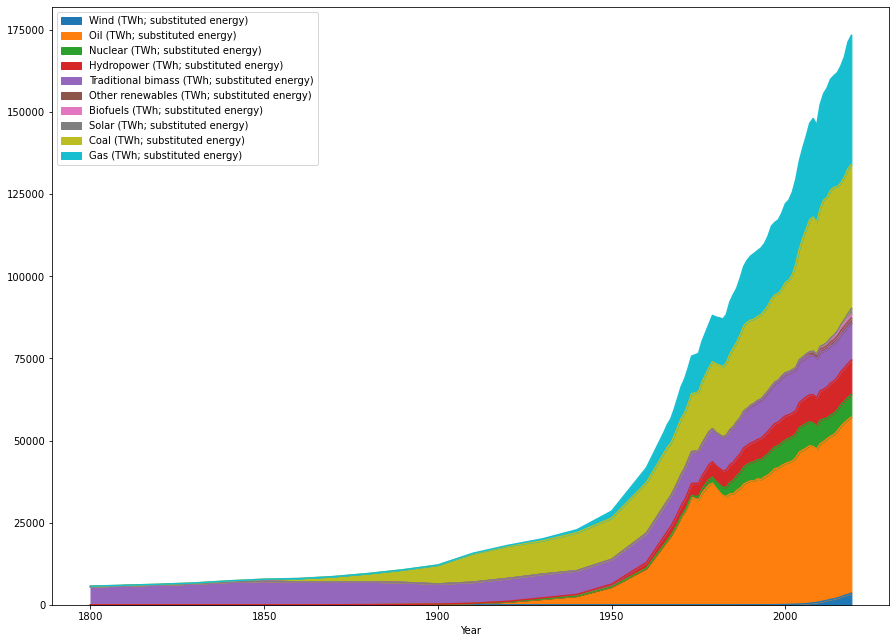

In [7]:
# Source
# https://ourworldindata.org/energy-production-consumption

df_energy = pd.read_csv('source_data/global-energy-substitution.csv')

df_energy.plot(x='Year', kind='area', figsize=(15,11))

df_energy.tail(20)

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
52,World,OWID_WRL,2000,87,42897,7169,7367,12500,517,116,3,27417,24000
53,World,OWID_WRL,2001,106,43278,7324,7131,12500,530,127,4,27853,24331
54,World,OWID_WRL,2002,143,43639,7393,7216,12470,566,149,5,28945,25053
55,World,OWID_WRL,2003,171,44610,7197,7159,12329,594,185,6,31497,25753
56,World,OWID_WRL,2004,230,46256,7476,7636,12160,637,209,8,33664,26736
57,World,OWID_WRL,2005,280,46824,7448,7845,12076,685,246,11,36171,27464
58,World,OWID_WRL,2006,355,47367,7493,8093,11993,726,313,15,38071,28175
59,World,OWID_WRL,2007,454,47958,7295,8179,11911,783,424,21,40224,29325
60,World,OWID_WRL,2008,582,47566,7227,8599,11829,833,574,33,40770,30025
61,World,OWID_WRL,2009,724,46654,7081,8533,11747,891,636,55,40149,29411


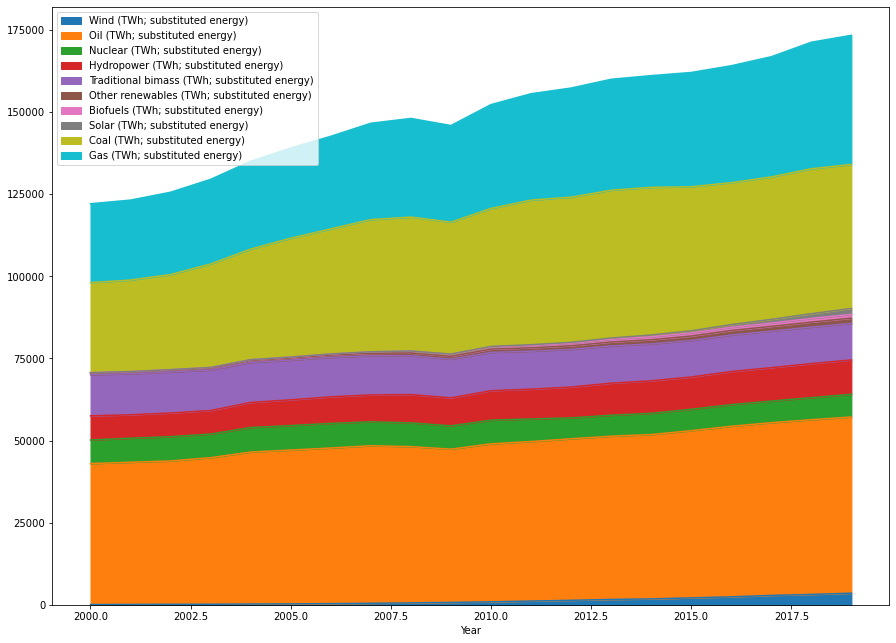

In [8]:
# for pitch deck, mock-up data

df_energy_pitch = df_energy.iloc[52:]

df_energy_pitch.plot(x='Year', kind='area', figsize=(15,11))

df_energy_pitch.tail(20)

## Paper production data

 Source 
 https://www.statista.com/statistics/270317/production-volume-of-paper-by-type/

A very simple data set showing paper production per type over the past 10 years

Timo's comment: As per my understanding we would be interested in Graphic paper (even though, it is surprisingly hard to tell into which class standard A4 would belong o.O )? There's some more info (including recycling) here: https://www.cepi.org/wp-content/uploads/2021/07/Key-Stats-2020-FINAL.pdf

,Year,Packaging paper and board,Graphic paper,Others
0,2008,193501,151489,45922
1,2009,190208,136385,44094
2,2010,204469,142866,46564
3,2011,209982,142047,46946
4,2012,213955,138756,47275
5,2013,219455,134600,48550
6,2014,225624,131078,49789
7,2015,231022,125501,51072
8,2016,235544,122624,52715
9,2017,245782,119678,54227


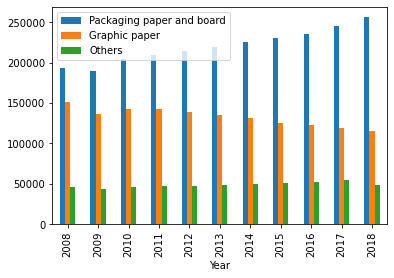

In [9]:
# Source 
# https://www.statista.com/statistics/270317/production-volume-of-paper-by-type/
# Global paper production volume from 2008 to 2018 by type (in 1,000 metric tons)

df_paper_prod = pd.read_excel('source_data/data_production-volume-of-paper-by-type-2008-2018.xlsx')

df_paper_prod.plot(x='Year', kind='bar')

df_paper_prod.head(20)

## Paper recycling data

Recycling per country for few decades. Paper and cardboard packaging.

Timo's comment: Don't think there's any preprocessing required here. Maybe just simple linear regression to estimate the recycling level (OBS_VALUE) in 5 years time?

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
202,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2000,61.9,NaN
203,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2001,58.0,NaN
204,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2002,60.9,NaN
205,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2003,62.8,NaN
206,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2004,70.2,NaN
207,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2005,79.1,NaN
208,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2006,86.1,NaN
209,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2007,87.6,NaN
210,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2008,93.1,NaN
211,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2009,94.7,NaN


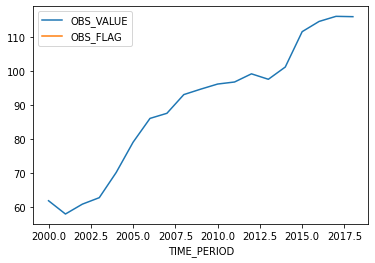

In [10]:
# Source
# https://ec.europa.eu/eurostat/databrowser/view/cei_wm020/default/table?lang=en

df_paper_rec_orig = pd.read_csv('source_data/estat_cei_wm020_filtered_en.csv')

#df_paper_rec_orig.head()
#df_paper_rec_orig['geo'] == 'EU27_2020'
#df_paper_rec_orig[df_paper_rec_orig['geo'] == 'EU27_2020']

# Restricting the view onto the EU27_2020 level for now

df_paper_rec = df_paper_rec_orig[df_paper_rec_orig['geo'] == 'FI']

df_paper_rec.plot(x='TIME_PERIOD')

df_paper_rec.head(30)

In [11]:
geo_codes=df_paper_rec_orig.geo.value_counts().index

In [12]:
df_paper_rec_orig[df_paper_rec_orig['geo'] == 'EE']

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
121,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2004,33.6,NaN
122,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2005,45.1,NaN
123,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2006,55.2,NaN
124,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2007,57.0,NaN
125,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2008,65.1,NaN
126,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2009,69.1,NaN
127,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2010,82.9,NaN
128,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2011,79.1,e
129,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2012,77.2,e
130,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EE,2013,75.5,NaN


,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
202,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2000,61.9,NaN
203,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2001,58.0,NaN
204,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2002,60.9,NaN
205,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2003,62.8,NaN
206,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2004,70.2,NaN
207,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2005,79.1,NaN
208,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2006,86.1,NaN
209,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2007,87.6,NaN
210,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2008,93.1,NaN
211,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2009,94.7,NaN


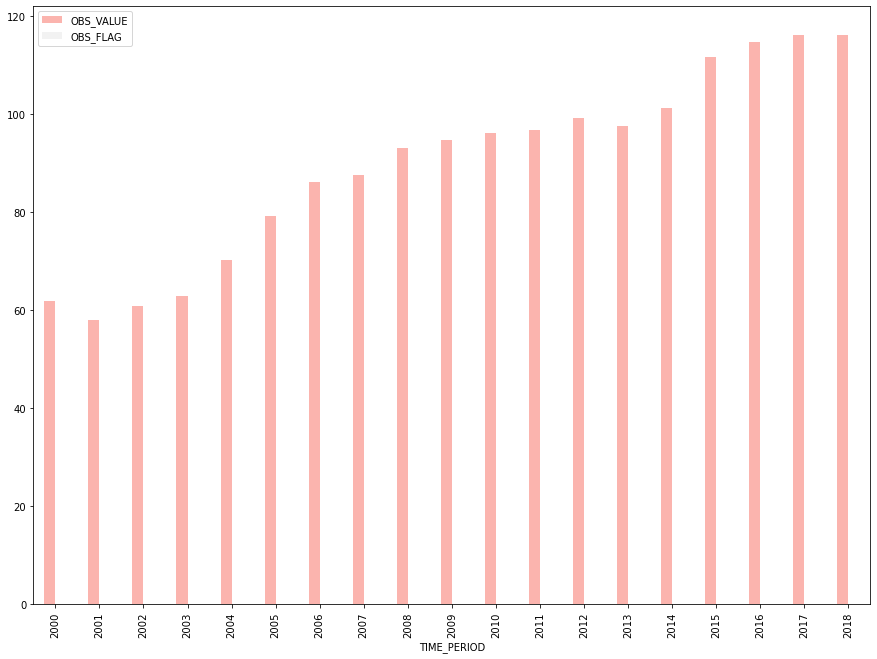

In [13]:
# Mock-up data for pitching

df_paper_rec_pitch = df_paper_rec

df_paper_rec_pitch.rename(columns={"OBS_VALUE": "Recycling rate"})

df_paper_rec_pitch.plot(x='TIME_PERIOD', kind='bar', figsize=(15,11), colormap='Pastel1')

df_paper_rec_pitch.head(20)

## Data analysis

Working with country energy data, extract only EU countries

In [14]:
df2

,year,iso_code,per_capita_electricity,energy_per_capita,renewables_share_elec,gdp,energy_per_gdp
0,1900,AFG,NaN,NaN,NaN,NaN,NaN
1,1901,AFG,NaN,NaN,NaN,NaN,NaN
2,1902,AFG,NaN,NaN,NaN,NaN,NaN
3,1903,AFG,NaN,NaN,NaN,NaN,NaN
4,1904,AFG,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17427,2015,ZWE,679.535,4027.628,54.070,2.503057e+10,2.223
17428,2016,ZWE,486.520,3385.574,45.577,2.515176e+10,1.889
17429,2017,ZWE,513.420,NaN,55.968,NaN,NaN
17430,2018,ZWE,632.524,NaN,56.947,NaN,NaN


In [15]:
#all iso_codes of EU countries
EU_coutries=['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']
in_EU=df2['iso_code'].apply(lambda x: x in EU_coutries) #flag of the indication that a country is in the EU
df2['in_EU']=in_EU.values 
eu_energy=df2[(df2['in_EU']==True)] #save only EU data
# eu_energy=eu_energy[(eu_energy['year']>=1985)]

<ipython-input-15-e914656345ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['in_EU']=in_EU.values


In [184]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [16]:
#for drawing some visualizations
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 16; med = 12; small = 9
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.4
0.11.1


D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


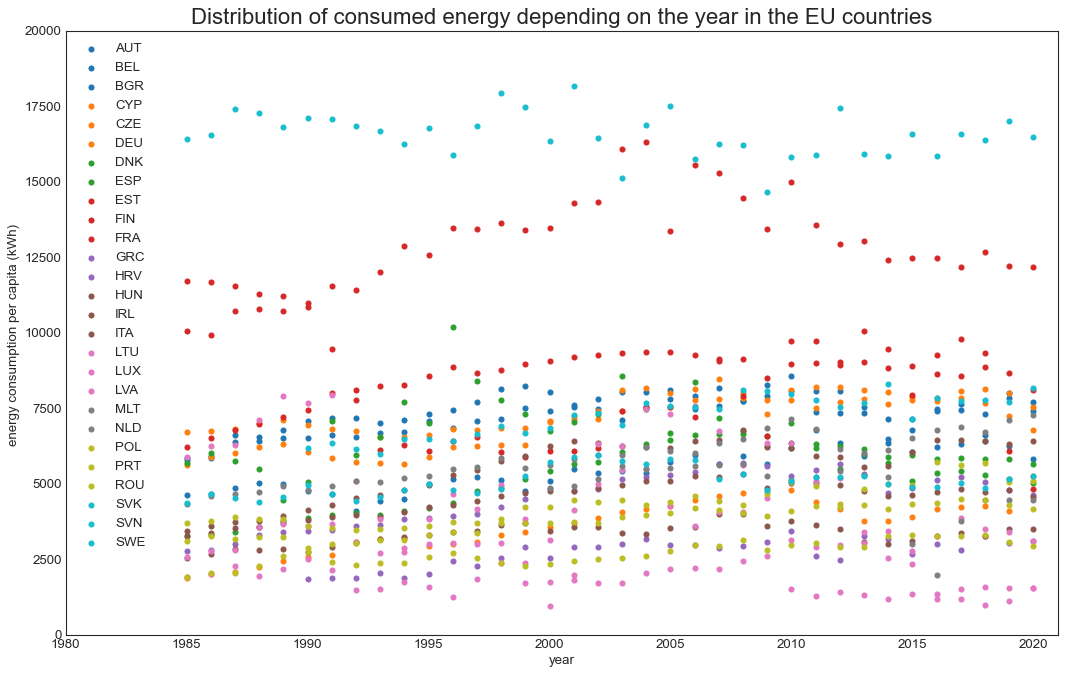

In [17]:
# Create as many colors as there are unique countries in eu_energy
categories = np.unique(eu_energy['iso_code'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    a=colors[i]
    arr = np.asarray(a)
    plt.scatter('year', 'per_capita_electricity',
                data=eu_energy.loc[eu_energy.iso_code==category, :], 
                s=20, c=arr.reshape(1,-1), label=str(category))

# Decorations
plt.gca().set(xlim=(1980, 2021),ylim=(0, 20000),
              xlabel='year',ylabel='energy consumption per capita (kWh) ')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Distribution of consumed energy depending on the year in the EU countries", fontsize=20)
plt.legend(fontsize=12,  loc='upper left')    
plt.show()  

In [18]:
eu_energy

,year,iso_code,per_capita_electricity,energy_per_capita,renewables_share_elec,gdp,energy_per_gdp,in_EU
1039,1900,AUT,NaN,NaN,NaN,1.864771e+10,NaN,True
1040,1901,AUT,NaN,NaN,NaN,1.872057e+10,NaN,True
1041,1902,AUT,NaN,NaN,NaN,1.945581e+10,NaN,True
1042,1903,AUT,NaN,NaN,NaN,1.963850e+10,NaN,True
1043,1904,AUT,NaN,NaN,NaN,1.994206e+10,NaN,True
...,...,...,...,...,...,...,...,...
14905,2016,SWE,15848.987,60480.052,57.173,4.400000e+11,1.352,True
14906,2017,SWE,16580.010,61979.856,57.883,NaN,NaN,True
14907,2018,SWE,16381.769,60350.691,55.799,NaN,NaN,True
14908,2019,SWE,16998.941,62046.921,58.480,NaN,NaN,True


D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


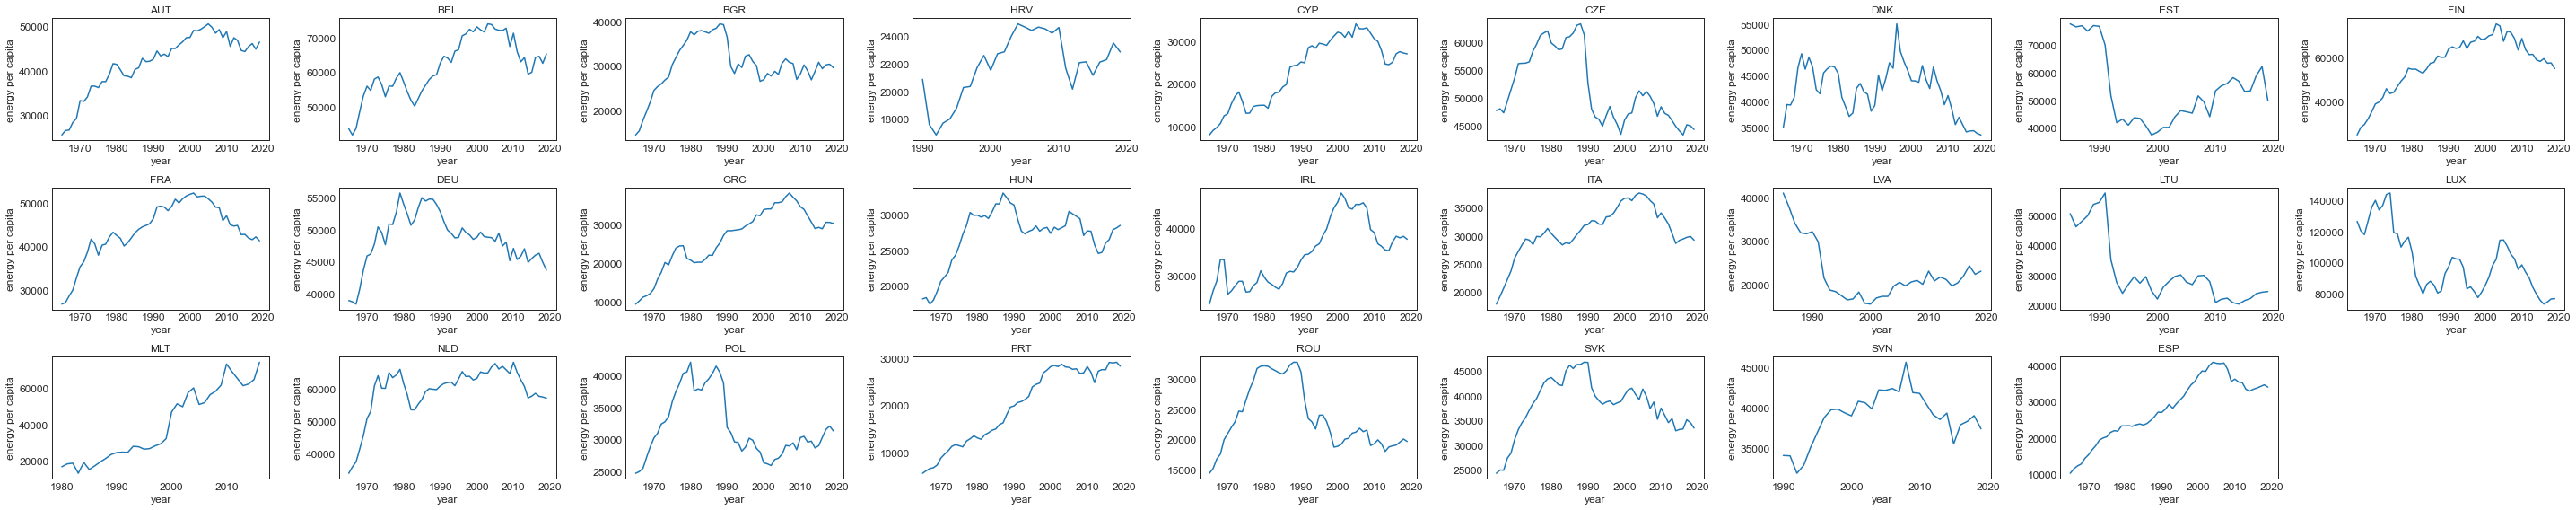

In [19]:
#distributions of energy consumption for countries separetely
fig = plt.figure(figsize=(40, 8))

for idx in range(1, len(EU_coutries)):
    ax = fig.add_subplot(3, 9, idx)
    df_t=eu_energy[eu_energy.iso_code==(EU_coutries[idx-1])]
    x=df_t.year
    y=df_t.energy_per_capita
    ax.plot(x, y, label=EU_coutries[idx-1])
    ax.set_title(f'{EU_coutries[idx-1]}')
    ax.set_xlabel('year')
    ax.set_ylabel('energy per capita')

# add spacing between subplots
fig.tight_layout()
fig.savefig('countries_energy_cons.pdf')

In [20]:
eu_energy

D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,iso_code,per_capita_electricity,energy_per_capita,renewables_share_elec,gdp,energy_per_gdp,in_EU
1039,1900,AUT,NaN,NaN,NaN,1.864771e+10,NaN,True
1040,1901,AUT,NaN,NaN,NaN,1.872057e+10,NaN,True
1041,1902,AUT,NaN,NaN,NaN,1.945581e+10,NaN,True
1042,1903,AUT,NaN,NaN,NaN,1.963850e+10,NaN,True
1043,1904,AUT,NaN,NaN,NaN,1.994206e+10,NaN,True
...,...,...,...,...,...,...,...,...
14905,2016,SWE,15848.987,60480.052,57.173,4.400000e+11,1.352,True
14906,2017,SWE,16580.010,61979.856,57.883,NaN,NaN,True
14907,2018,SWE,16381.769,60350.691,55.799,NaN,NaN,True
14908,2019,SWE,16998.941,62046.921,58.480,NaN,NaN,True


In [21]:
eu_energy.renewables_share_elec

D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1039        NaN
1040        NaN
1041        NaN
1042        NaN
1043        NaN
          ...  
14905    57.173
14906    57.883
14907    55.799
14908    58.480
14909    67.622
Name: renewables_share_elec, Length: 2432, dtype: float64

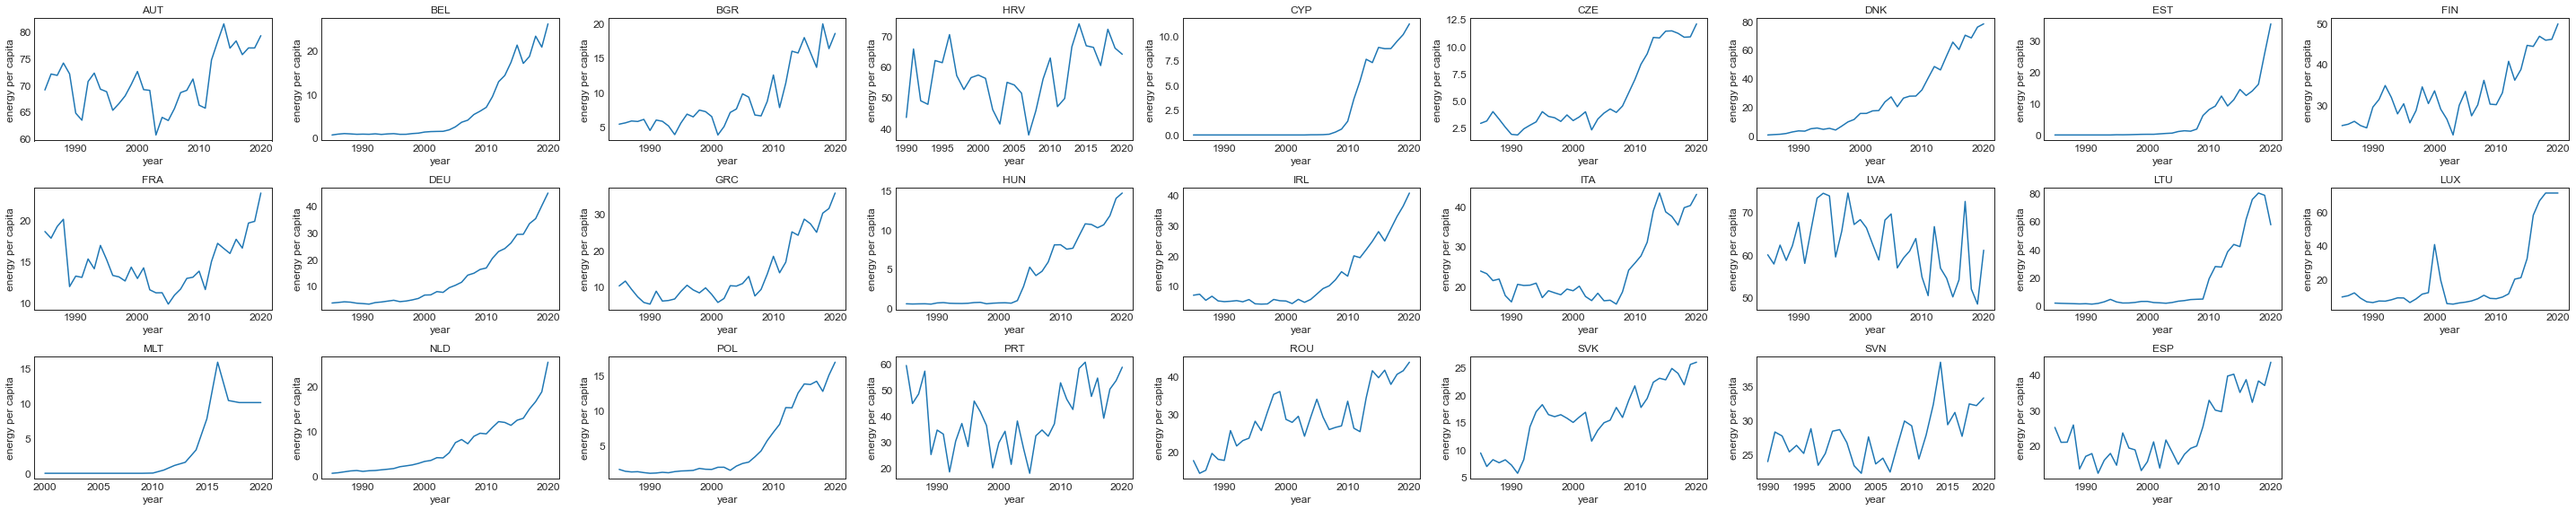

In [22]:
#distributions of share of renewable electicity for countries separetely
fig = plt.figure(figsize=(40, 8))

for idx in range(1, len(EU_coutries)):
    ax = fig.add_subplot(3, 9, idx)
    df_t=eu_energy[eu_energy.iso_code==(EU_coutries[idx-1])]
    x=df_t.year
    y=df_t.renewables_share_elec
    ax.plot(x, y, label=EU_coutries[idx-1])
    ax.set_title(f'{EU_coutries[idx-1]}')
    ax.set_xlabel('year')
    ax.set_ylabel('energy per capita')

# add spacing between subplots
fig.tight_layout()
fig.savefig('countries_share_renewable_elec.pdf')

D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


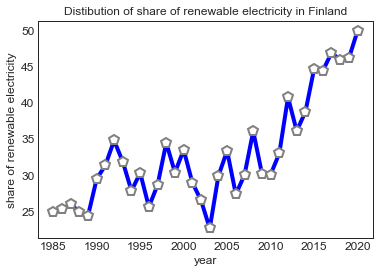

In [23]:
#function to receive distribution of share of renewable electicity by code
def share_renewable_elec(iso_code, country):
    if iso_code not in EU_coutries:
        return "Does not exist"
    
    df =eu_energy[eu_energy.iso_code==iso_code]
    x=df.year
    y=df.renewables_share_elec
    plt.plot(x, y, '-p', color='blue',
         markersize=10, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
    plt.title(f'Distibution of share of renewable electricity in {country}')
    plt.xlabel('year')
    plt.ylabel('share of renewable electricity')
    
share_renewable_elec("FIN", 'Finland')

D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx a

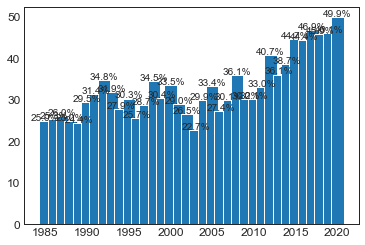

In [24]:
df =eu_energy[eu_energy.iso_code=='FIN']
x=df.year
y=df.renewables_share_elec

width = 1.5
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10, s="{:.1f}%".format(height), ha='center')

plt.show()

In [216]:
geo_codes

Index(['SE', 'UK', 'EL', 'DK', 'LU', 'FI', 'BE', 'AT', 'FR', 'IT', 'ES', 'PT',
       'DE', 'IE', 'NL', 'CZ', 'SK', 'LT', 'MT', 'LV', 'HU', 'SI', 'PL', 'CY',
       'EE', 'EU27_2020', 'RO', 'BG', 'EU28', 'LI', 'NO', 'HR', 'IS'],
      dtype='object')

In [25]:
df_paper_rec[df_paper_rec.geo=='FI']

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
202,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2000,61.9,NaN
203,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2001,58.0,NaN
204,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2002,60.9,NaN
205,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2003,62.8,NaN
206,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2004,70.2,NaN
207,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2005,79.1,NaN
208,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2006,86.1,NaN
209,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2007,87.6,NaN
210,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2008,93.1,NaN
211,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,FI,2009,94.7,NaN


In [26]:
countries={'Austria':['AUT','AT'],'Belgium':['BEL','BE'], 'Bulgaria': ['BGR','BG'], 'Croatia': ['HRV','HR'], 'Cyprus':['CYP','CY'],
                    'Czechia':['CZE','CZ'],'Denmark':['DNK','DK'], 'Estonia':['EST','EE'], 'Finland': ['FIN','FI'],
                                    'France':['FRA','FR'], 'Germany':['DEU','DE'], 'Greece': ['GRC','EL'], 
                                                'Hungary':['HUN','HU'], 'Ireland':['IRL','IE'], 'Italy':['ITA','IT'],
                                                            'Latvia': ['LVA', 'LV'], 'Lithuania':['LTU','LT'],
                                                                    'Luxembourg':['LUX','LU'], 'Malta':['MLT','MT'],
                                                                            'Netherlands':['NLD','NL'], 'Poland':['POL','PL'],
                                                                                    'Portugal':['PRT','PT'],'Romania':['ROU','RO'],
                                                                                            'Slovakia':['SVK','SK'], 
                                                                                                'Slovenia': ['SVN','SI'],
                                                                                                    'Spain':['ESP','ES'],
                                                                                                        'Sweden':['SWE', 'SE']}

D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


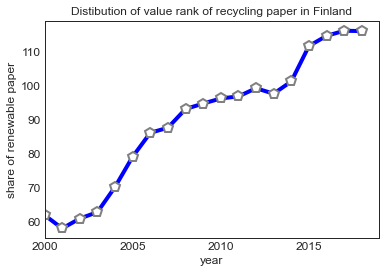

In [28]:
#function to receive distibution of value rank of recycling paper by code
def share_renewable_paper(country):
    country_code=countries.get(country)[1]
    if country_code not in geo_codes:
        return "Does not exist"
    
    df = df_paper_rec[df_paper_rec.geo==country_code]
    x=df.TIME_PERIOD
    y=df.OBS_VALUE
    plt.plot(x, y, '-p', color='blue',
         markersize=10, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.xlim([2000, 2019])
    plt.title(f'Distibution of value rank of recycling paper in {country}')
    plt.xlabel('year')
    plt.ylabel('share of renewable paper')

share_renewable_paper('Finland')

In [29]:
def share_renewable(country):
    country_code=countries.get(country)[1]
    iso_code=countries.get(country)[0]
    if iso_code not in EU_coutries and country_code not in geo_codes :
        return "Does not exist"
    
    df =eu_energy[eu_energy.iso_code==iso_code]
    x=df.year
    y=df.renewables_share_elec
    
    plt.plot(x, y, '-p', color='blue',
         markersize=10, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2, label='renewable_elec')
    
    df2 = df_paper_rec[df_paper_rec.geo==country_code]
    x2=df2.TIME_PERIOD
    y2=df2.OBS_VALUE
    plt.plot(x2, y2, '-p', color='green',
         markersize=10, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2, label='recycling_paper')
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.xlim([2000, 2019])
    plt.legend()
    plt.title(f'Distibution of recycling source in {country}')
    plt.xlabel('year')
    plt.ylabel('share of renewable source')



D:\ds_programs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


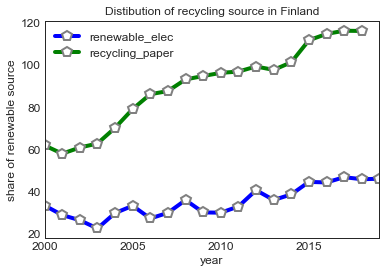

In [30]:
share_renewable("Finland")